In [50]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline
params = {"ytick.color" : "c",
          "xtick.color" : "c",
          "axes.labelcolor" : "c",
          "axes.edgecolor" : "c",
         "text.color" : "c"}
plt.rcParams.update(params)

import pandas as pd
from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN
from collections import Counter
from itertools import cycle
from sklearn import datasets, metrics#silhouette

#from sklearn.decomposition import PCA
import seaborn as sns

zadanie0<br>
Kilka popularnych algorytmów grupowania danych dostępnych jest w pakiecie SciKit do Pythona.
Zapoznaj się z nimi wykonując skrypt umieszczony w materiałach do wykładu.<br>
a) Jakie znaczenie ma parametr n_init w implementacji algorytmu KMeans? Powtórz obliczenia z
różnymi wartościami tego parametru i przeanalizuj wyniki.<br>
b) Jakie znaczenie ma parametr threshold w implementacji algorytmu Birch? Powtórz obliczenia z<br>
różnymi wartościami tego parametru i przeanalizuj wyniki.
c) Jakie znaczenie ma parametr eps w implementacji algorytmu DBScan? Powtórz obliczenia z
różnymi wartościami tego parametru i przeanalizuj wyniki.<br>
d) Rozszerz skrypt tak, aby na rysunkach z wynikami algorytmu DBScan widoczne były także
punkty danych nie przypisane przez algorytm do żadnej grupy.<br>
e) Wyniki grupowania danych IRIS są pokazywane na rysunkach dla dwóch pierwszych cech. Zrób
rysunki dla pozostałych par cech.<br>
f) Rozszerz skrypt tak, aby oceniał każde wykonane grupowanie danych wskaźnikami poprawności
grupowania, takimi jak Silhouette Coefficient, Dunn Index oraz Davies-Bouldin Index.

In [51]:
# zbiory danych
bX, bY = datasets.make_blobs(n_samples=3000, n_features=2, centers=centers_, cluster_std=0.5)
iris = datasets.load_iris()

In [145]:
#f rozszerzenie
#definicje kolejnych wskaznikow poprawnosci
def dist_matrix(X, r):
    res = (np.sum(X ** 2, axis=1)[:,np.newaxis] - 2 * np.dot(X,r.T) +
                np.sum(r ** 2, axis=1))
    return np.sqrt(np.round(res,10))

#worst case indicator
def dunn_index(X, labels):#, centroid): #wlasna implementacja
    k = np.unique(labels).size
    #z definicji minimalna odleglosci miedzy clustrami
    intercluster = min((np.min(dist_matrix(X[labels == i], X[labels == j]))
                         for i in range(k) for j in range(i + 1, k)))
    intracluster = max((np.max(dist_matrix(X[labels == i], X[labels == i])) for i in range(k)))
    return intercluster / intracluster


def davies_bouldin_index(X, labels, C):
    k = np.unique(labels).size
    #Si
    dist = [np.sqrt(np.sum(dist_matrix(X[labels == i], np.array([C[i]])) ** 2) / np.sum(labels == i))
                 for i in range(k)]
    #Mij
    centroids_dist = dist_matrix(C, C)
    #DB - sum max (Si+Sj)/Mij / N
    res = np.sum([max(((dist[i] + dist[j]) / centroids_dist[i][j] for j in range(k) if i != j))
                  for i in range(k)]) / k
    return res

In [177]:
def plotClustering(X, plt_labels, centers, features=(0,1), ax=plt):
    ax.scatter(X[:,features[0]], X[:,features[1]],c=plt_labels, edgecolor='black',
            alpha=0.8)
    ax.scatter(centers[:,features[0]], centers[:,features[1]], c=np.arange(len(centers)),
            edgecolor='red', s=100,marker='P')
    
#podanie wskaznikow    
def evaluate_metrics(df, labels, centroids):
    silhouette_score = metrics.silhouette_score(df, labels, metric='euclidean')
    davies_bouldin_score = davies_bouldin_index(df, labels, centroids)
    dunn = dunn_index(df, labels)#, centroids)
    print("Silhouette Coefficient: %.5f" %(silhouette_score))
    print("Davies-Bouldin score: %.5f" % davies_bouldin_score)
    print("Dunn Index: %.5f" %(dunn))

def get_grouping(group_foo, k, param):
    if group_foo == KMeans:
        return group_foo(n_clusters=k, n_init=param)
    if group_foo == Birch:
        return group_foo(threshold=param, n_clusters=k)
    
def get_centers(group_foo, grouping, X):
    if group_foo == KMeans:
        return grouping.cluster_centers_
    
    if group_foo == Birch:
        return grouping.subcluster_centers_

def group(X, group_foo, k, r):
    fig, axes = plt.subplots(1, len(r))
    fig.set_size_inches(15,6)
    for ax, param in zip(axes, r):
        grouping = get_grouping(group_foo, k, param)
        grouping.fit(X)
        centers = get_centers(group_foo, grouping, X)
        plotClustering(X, grouping.labels_, centers=centers, ax=ax)
        ax.set_title(f'param: {param}')
        print('variable', param)
        evaluate_metrics(X, grouping.labels_, centers)

variable 1
Silhouette Coefficient: 0.67170
Davies-Bouldin score: 0.50434
Dunn Index: 0.00919
variable 10
Silhouette Coefficient: 0.67172
Davies-Bouldin score: 0.50421
Dunn Index: 0.02974
variable 100
Silhouette Coefficient: 0.67172
Davies-Bouldin score: 0.50421
Dunn Index: 0.02974


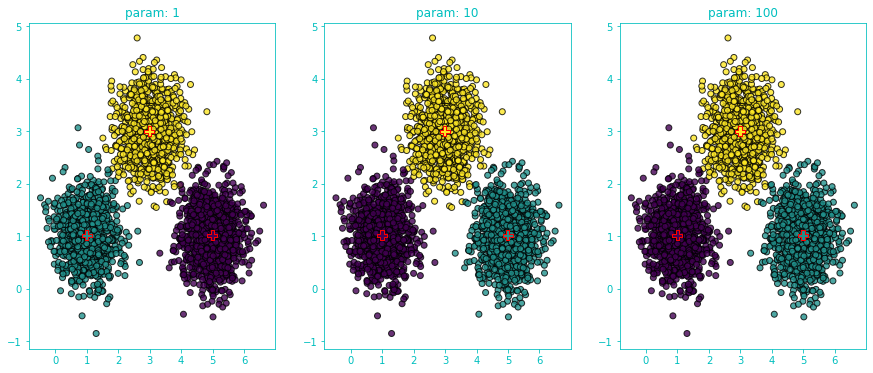

In [178]:
#a
#n_init 
#Number of time the k-means algorithm will be run with different centroid seeds. 
#The final results will be the best output of n_init consecutive runs in terms of inertia.
#ilosc iteracji dla roznych poczatkowych centroidow -> inne wyniki w zaleznosci od uwarunkowania

group(blobX, KMeans, k=3, r=[1,10,100])


0.4 :

Silhouette Coefficient: 0.31860
Davies-Bouldin score: 0.91968
Dunn Index: 0.00524
0.6 :

Silhouette Coefficient: 0.29738
Davies-Bouldin score: 1.24727
Dunn Index: 0.00519
0.8 :

Silhouette Coefficient: 0.41695
Davies-Bouldin score: 1.23354
Dunn Index: 0.00283
1 :

Silhouette Coefficient: 0.67499
Davies-Bouldin score: 0.49850
Dunn Index: 0.03123
CPU times: user 4.44 s, sys: 140 ms, total: 4.58 s
Wall time: 1.24 s


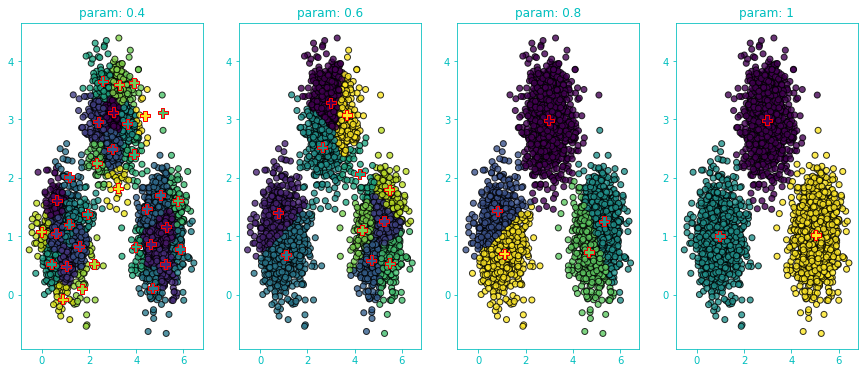

In [174]:
#b
#threshold
#The radius of the subcluster obtained by merging a new sample and the closest subcluster
#should be lesser than the threshold. Otherwise a new subcluster is started. 
#Setting this value to be very low promotes splitting and vice-versa.
#promien ograniczajacy clustery
%%time
group(bX, Birch, k=None, r=[0.4, 0.6, 0.8, 1])

eps: 0.18

Silhouette Coefficient: 0.47217
Davies-Bouldin score: 1.66931
Dunn Index: 0.00150
eps: 0.4

Silhouette Coefficient: 0.66146
Davies-Bouldin score: 3.16845
Dunn Index: 0.01816
CPU times: user 2.2 s, sys: 56.4 ms, total: 2.26 s
Wall time: 648 ms


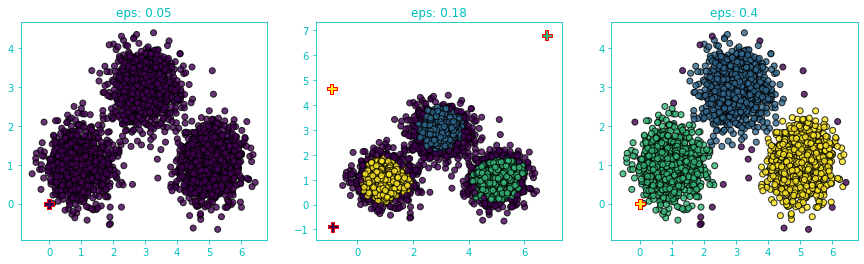

In [202]:
%%time
#c
#eps
#The maximum distance between two samples for one to be considered 
#as in the neighborhood of the other. This is not a maximum bound 
#on the distances of points within a cluster. 
#This is the most important DBSCAN parameter to choose appropriately 
#for your data set and distance function.
#maksymalna odlegosc miedzy pkt

X = bX
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15,4)
for ax, eps in zip(axes, [0.05, 0.18, 0.4]):
    dbscan = DBSCAN(eps=eps, min_samples=25)
    dbscan.fit(X)
        
    labels = dbscan.labels_ - np.min(dbscan.labels_) if any(dbscan.labels_< 0) else dbscan.labels_
    centers = np.empty((X.shape[1],np.unique(labels).size))
    plotClustering(X, dbscan.labels_, centers.T, ax=ax)
    ax.set_title(f'eps: {eps}')

    for i in range(np.unique(labels).shape[0] -1):
        l = X.T[:,labels == i]
        centers[:,i] = np.sum(l, axis=1)/l.shape[1]

    if np.unique(labels).size > 1:
        print(f'eps: {eps}\n')
        evaluate_metrics(X, labels, centers.T)


In [208]:
#e
iris_data = pd.DataFrame(iris.data)

CPU times: user 4.11 s, sys: 24 ms, total: 4.14 s
Wall time: 4.12 s


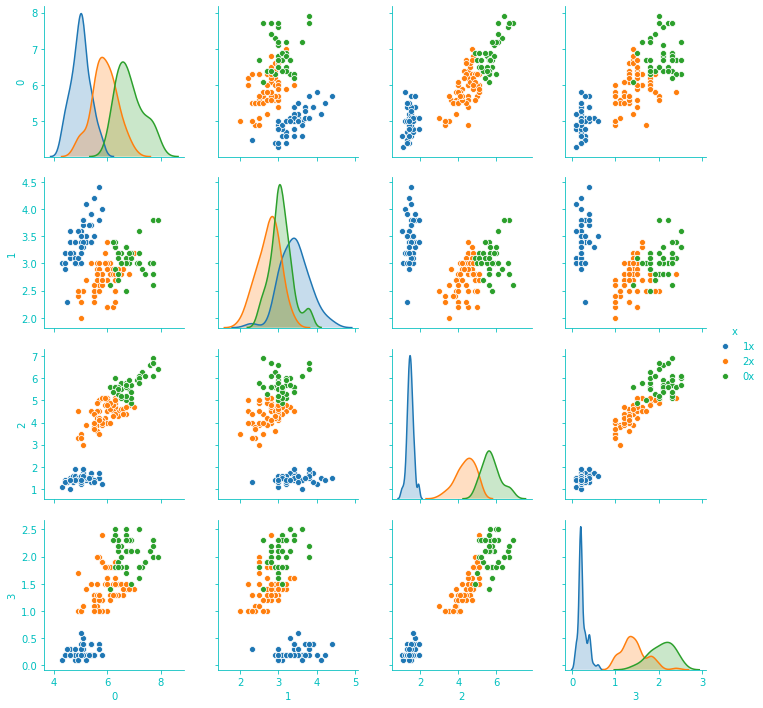

In [223]:
%%time
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, 
                 tol=0.0001).fit(iris.data)
iris_data['x'] = list(map(lambda x: str(x) + 'x', kmeans.labels_))
sns.pairplot(iris_data, hue='x')

CPU times: user 4.03 s, sys: 7.9 ms, total: 4.04 s
Wall time: 4.03 s


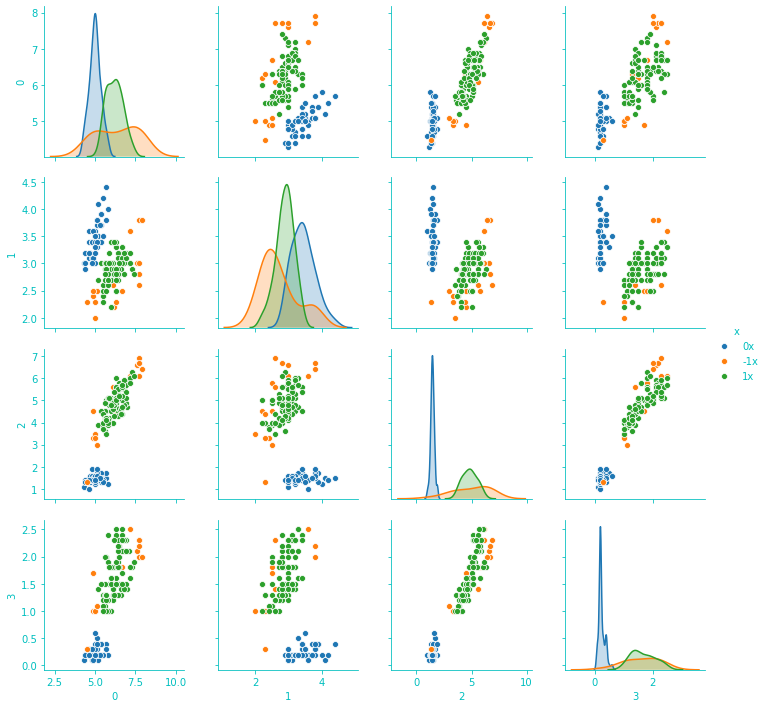

In [224]:
%%time
dbs = DBSCAN(eps=0.5, min_samples=5,metric='euclidean', leaf_size=30).fit(iris.data)
iris_data['x'] = list(map(lambda x: str(x) + 'x', dbs.labels_))
sns.pairplot(iris_data, hue='x')

CPU times: user 4.17 s, sys: 35.9 ms, total: 4.2 s
Wall time: 4.22 s


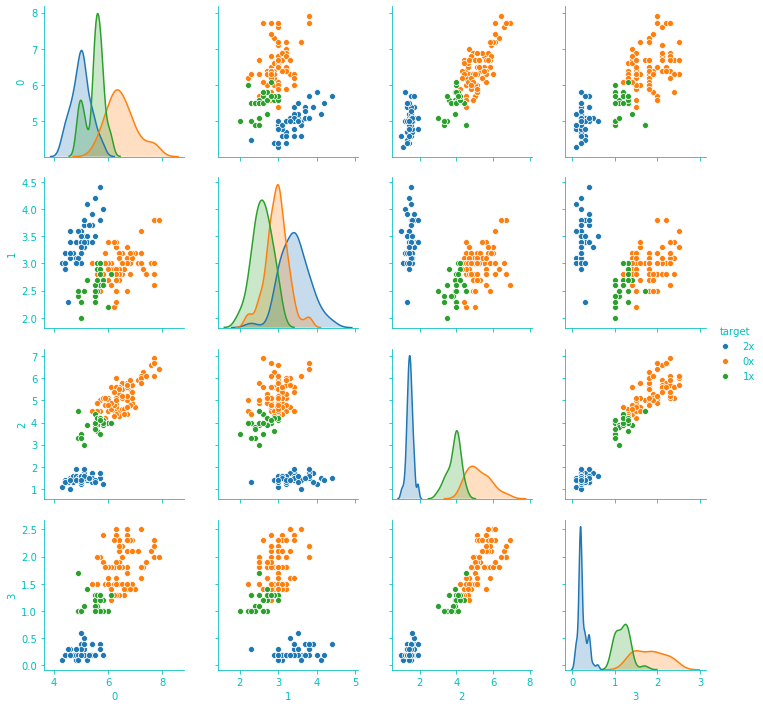

In [215]:
%%time
bbirch = Birch(branching_factor=50, n_clusters=3, threshold=0.5, 
            compute_labels=True).fit(iris.data)
iris_data['target'] = list(map(lambda x: str(x) + 'x', bbirch.labels_))
sns.pairplot(iris_data, hue='target')

zadanie1<br>
Zapoznaj się dokładniej z implementacją algorytmu BIRCH w SciKit.<br>
a) Wykonaj grupowanie z niskią wartością parametru threshold (na przykład 0.25).
Algorytm utworzy wówczas dużo grup danych (zazwyczaj więcej niż potrzeba).<br>
b) Zrób nowy rysunek wyników algorytmu BIRCH. Zaznacz na nim pozycje centrów grup
przypisanych do korzenia utworzonego drzewa grupowania (korzeń drzewa zapisany jest w birch.root, zaś centra w birch.root.centroids_) oraz punkty danych w kolorach odpowiadającym<br>
utworzonym grupom. Jeśli utworzone drzewo grupowania ma więcej poziomów, to zrób jeszcze
rysunek dla grupowania na poziomie niżej niż korzeń.
c) Jakie znaczenie ma parametr n_clusters? Czym różni się n_clusters =None od n_clusters = 3

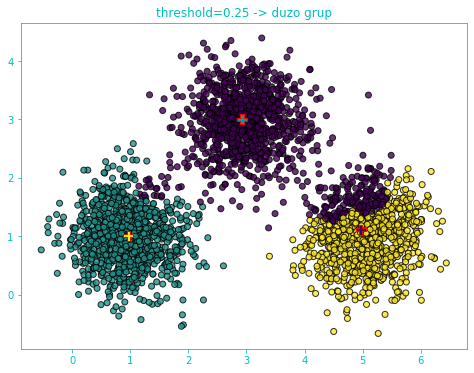

CPU times: user 932 ms, sys: 31.8 ms, total: 964 ms
Wall time: 371 ms


In [198]:
#a
%%time
birch = Birch(threshold=0.25, n_clusters=3)
birch.fit(bX)
root_centers = birch.root_.centroids_
plt.figure(figsize=(8,6)) 
plotClustering(X, birch.labels_, root_centers)
plt.title('threshold=0.25 -> duzo grup')
plt.show()

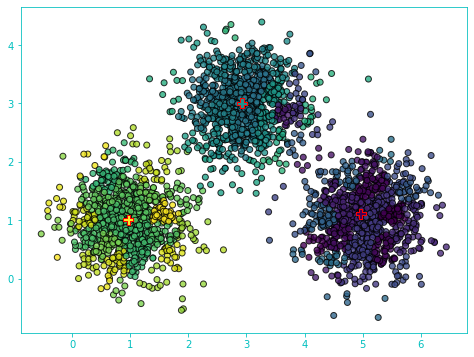

CPU times: user 935 ms, sys: 8.03 ms, total: 943 ms
Wall time: 350 ms


In [199]:
#b
%%time
birch = Birch(threshold=0.25, n_clusters=None)
birch.fit(bX)

root_centers = birch.root_.centroids_
plt.figure(figsize=(8,6)) 
plotClustering(X, birch.labels_, root_centers)
plt.show()
print(birch.root_)
#pozycje centrow do korzenia

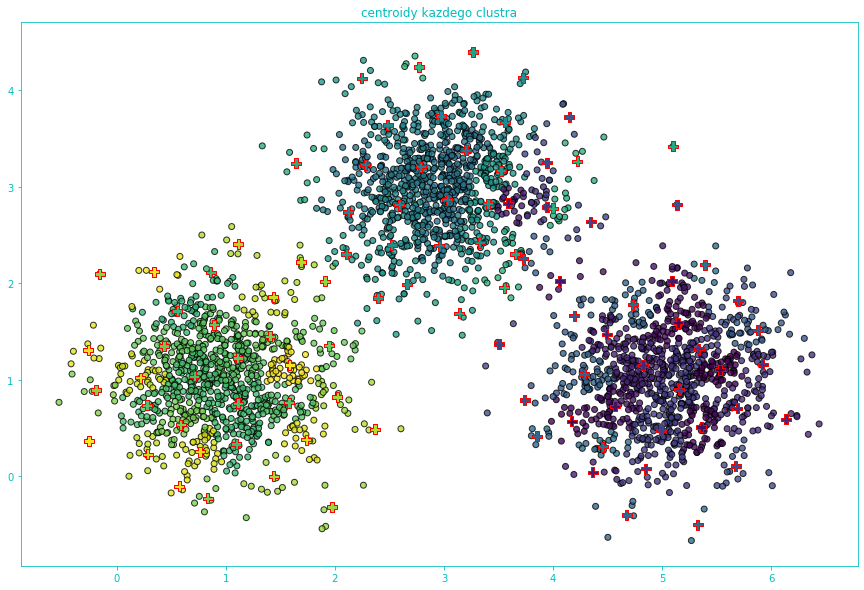

CPU times: user 327 ms, sys: 3.97 ms, total: 331 ms
Wall time: 326 ms


In [200]:
%%time

plt.figure(figsize=(15,10)) 

subcluster_centers = birch.subcluster_centers_
plotClustering(X, birch.labels_, subcluster_centers)
plt.title('centroidy kazdego clustra')
plt.show()
#poziom nizen - subclusters

c)<br> odpowiedz z dokumentacji<br>
n_clusters : <br>
 default 3
Number of clusters after the final clustering step, which treats the subclusters from the leaves as new samples.<br>
None : the final clustering step is not performed and the subclusters are returned as they are.